In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import kurtosis, skew


1. Загрузить файл auto.csv

In [14]:
stats = pd.read_csv('auto.csv', sep = ',')
stats.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
stats.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [19]:
stats.describe()#.columns

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [30]:
for param in stats.describe().columns:
    print(f'Основные статистики для параметра {param}:')
    print('\tМатематическое ожидание: ', round(statistics.mean(stats[param]), 2))
    print('\tСтандартное отклонение: ', round(statistics.pstdev(stats[param]), 2))
    print('\tДисперсия: ', round(statistics.pvariance(stats[param]), 2))
    print('\tМедиана: ', statistics.median(stats[param]))
    try:
        print('\tЗначение моды: ', statistics.mode(stats[param]))
    except:
        print('\tНе удалось найти моду')
    print('\tЗначение минимум: ', min(stats[param]))
    print('\tЗначение максимум: ', max(stats[param]))
    print('\tРазмах: ', round(max(stats[param])-min(stats[param]), 2))

Основные статистики для параметра symboling:
	Математическое ожидание:  0.83
	Стандартное отклонение:  1.24
	Дисперсия:  1.54
	Медиана:  1
	Значение моды:  0
	Значение минимум:  -2
	Значение максимум:  3
	Размах:  5
Основные статистики для параметра normalized-losses:
	Математическое ожидание:  126.37
	Стандартное отклонение:  35.35
	Дисперсия:  1249.75
	Медиана:  122
	Значение моды:  161
	Значение минимум:  65
	Значение максимум:  256
	Размах:  191
Основные статистики для параметра wheel-base:
	Математическое ожидание:  98.76
	Стандартное отклонение:  6.01
	Дисперсия:  36.08
	Медиана:  97.0
	Значение моды:  94.5
	Значение минимум:  86.6
	Значение максимум:  120.9
	Размах:  34.3
Основные статистики для параметра length:
	Математическое ожидание:  174.05
	Стандартное отклонение:  12.31
	Дисперсия:  151.47
	Медиана:  173.2
	Значение моды:  157.3
	Значение минимум:  141.1
	Значение максимум:  208.1
	Размах:  67.0
Основные статистики для параметра width:
	Математическое ожидание:  65.91
	С

3. Рассчитать и визуализировать корреляционную матрицу для переменных

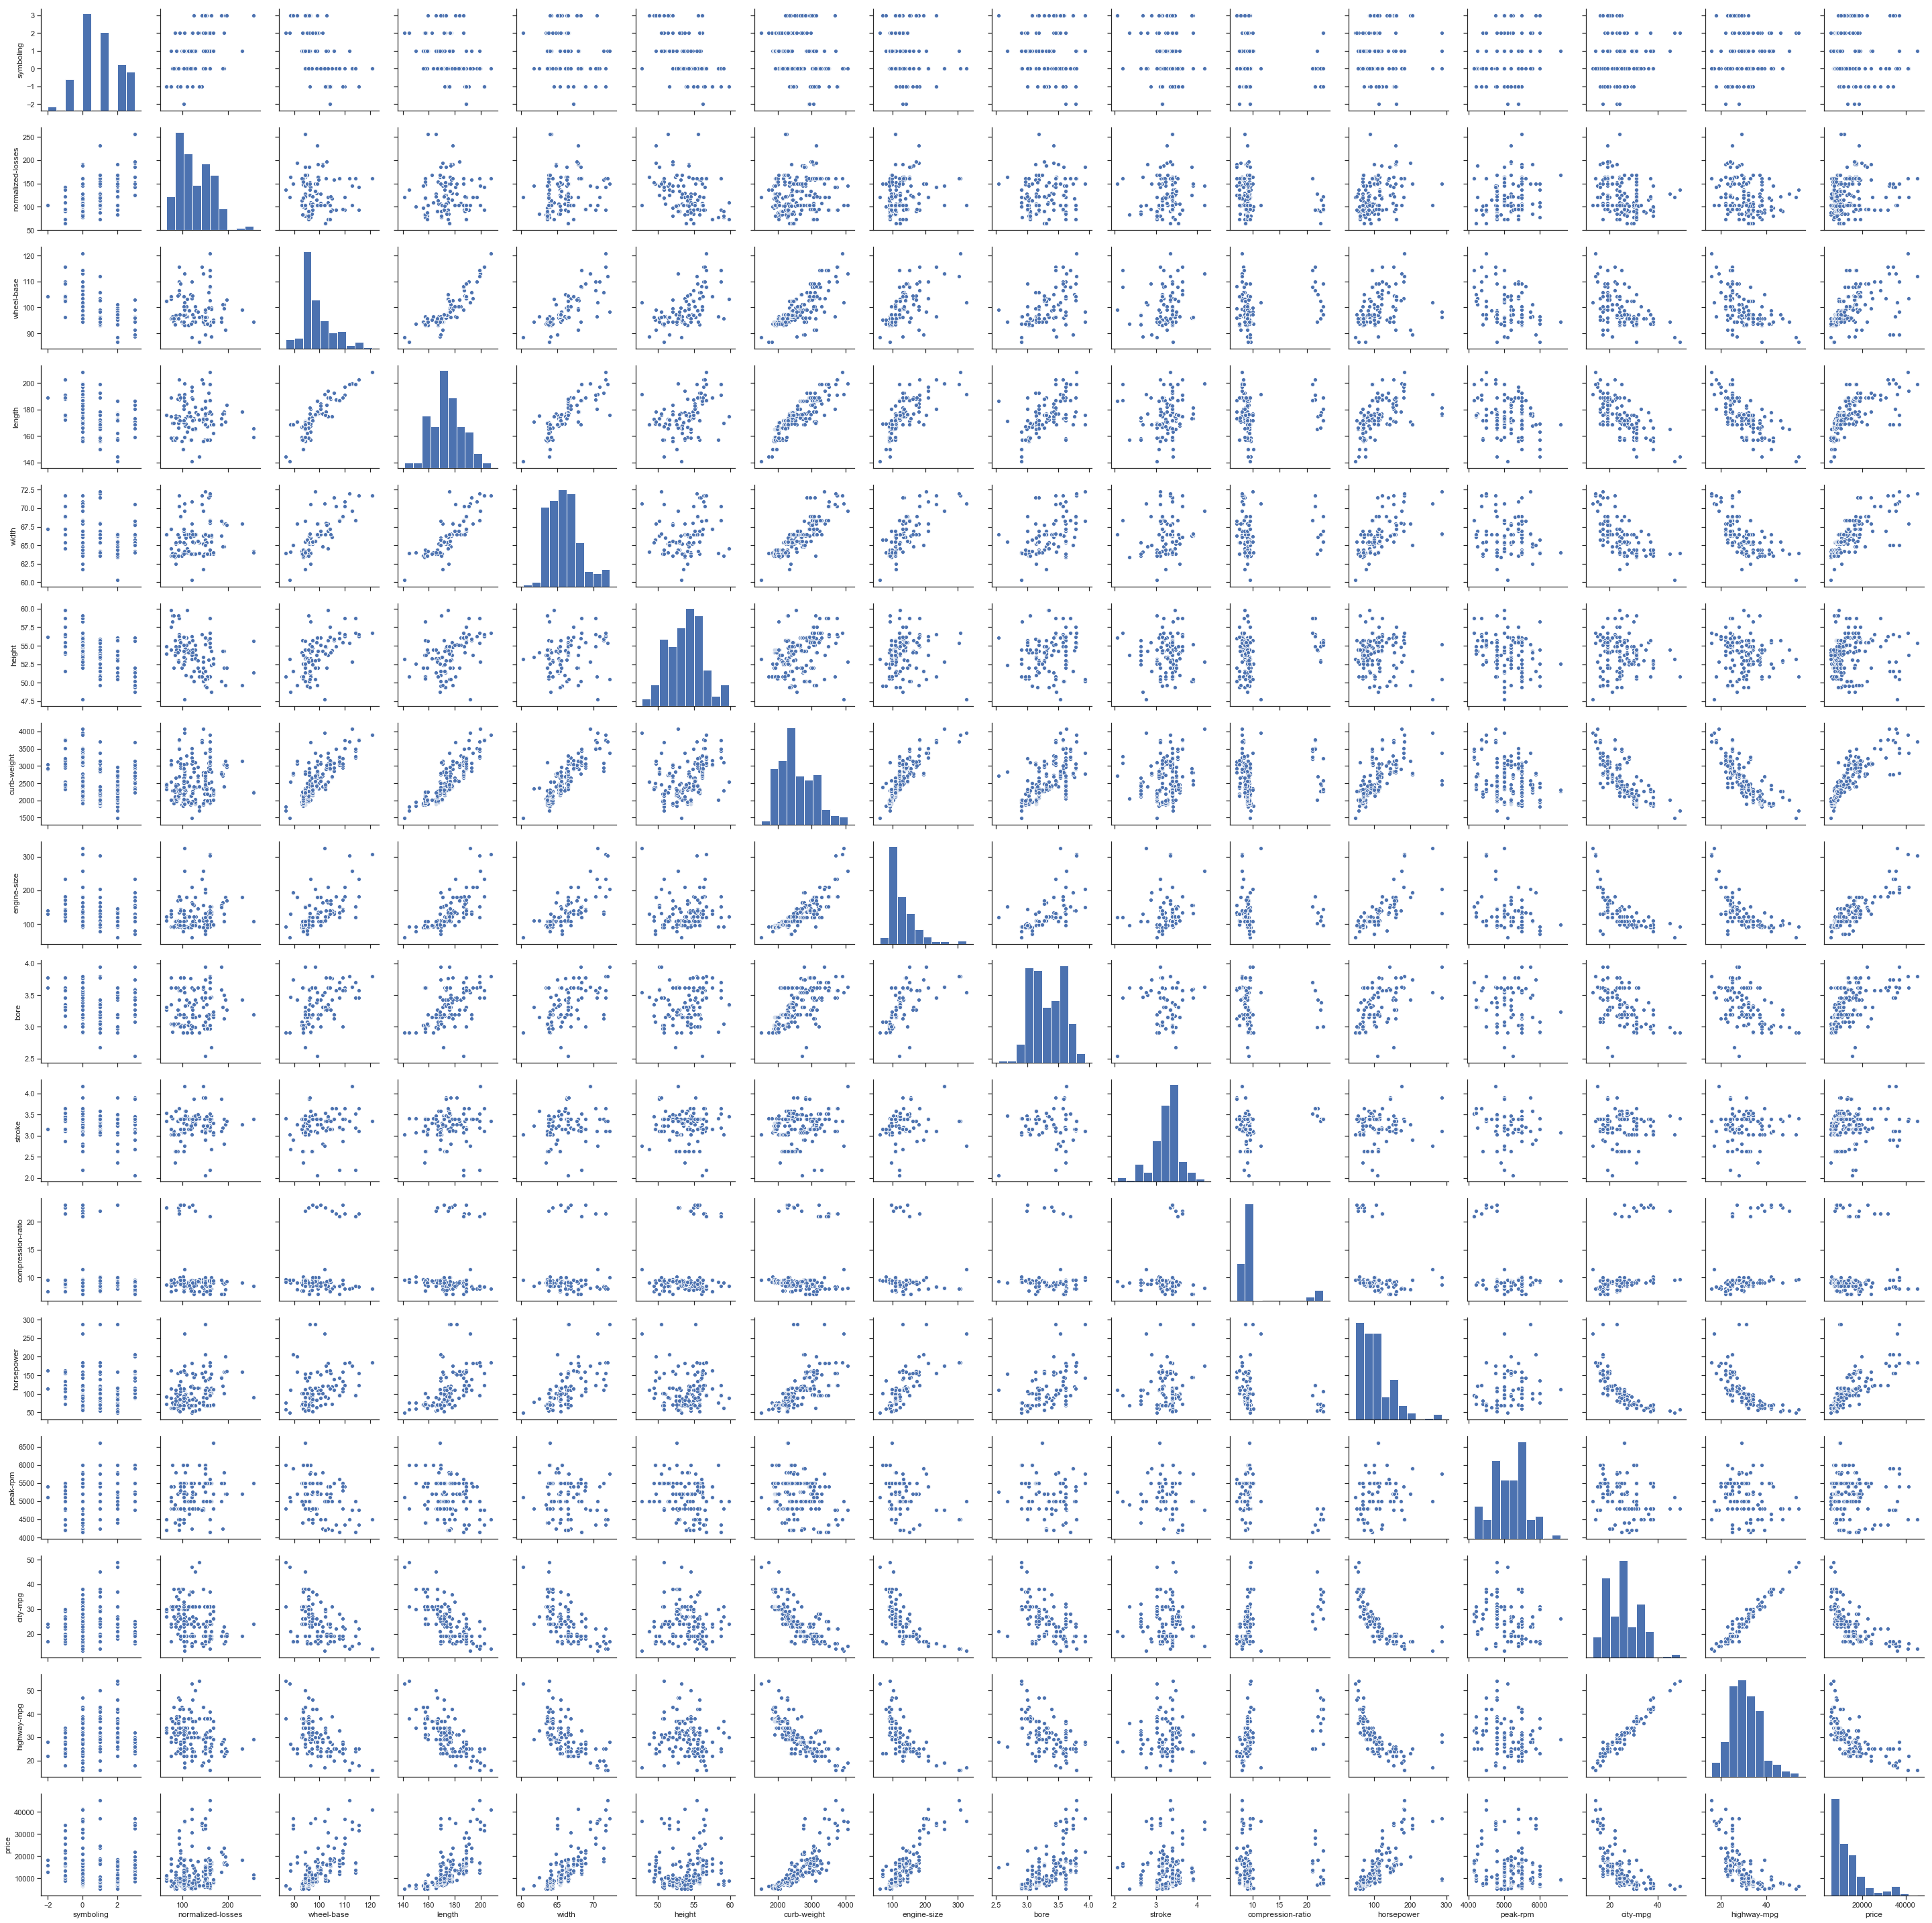

In [33]:
sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
g = sns.pairplot(stats[stats.dbescribe().columns])

4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

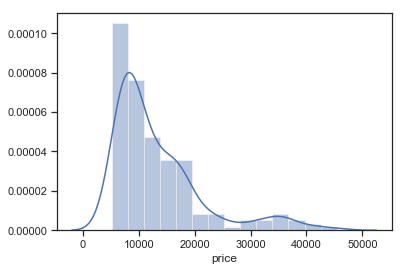

Показатель  kurtosis равен: 2.948637293212561
Показатель skewness равен: 1.7663998888191028


In [56]:
sns.distplot(stats['price'])
plt.show()
print( 'Показатель  kurtosis равен: {}'.format( stats['price'].kurtosis()))
print( 'Показатель skewness равен: {}'.format( stats['price'].skew()))

5. Визуализировать несколько взаимосвязей между переменными  
6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [69]:
stats['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

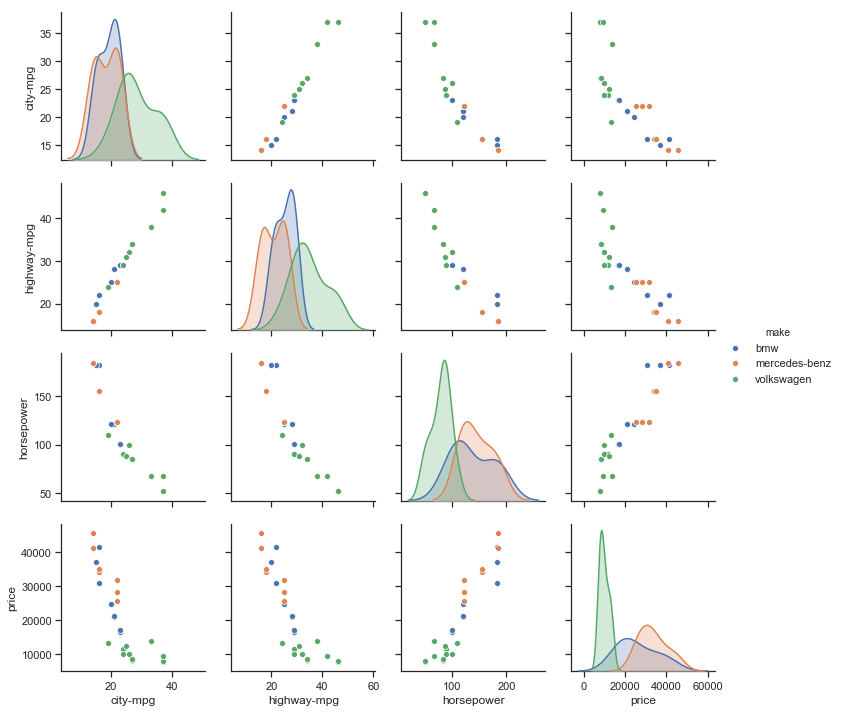

In [73]:
cols = ['city-mpg', 'highway-mpg', 'horsepower', 'price', 'drive-wheels', 'make']
fig = sns.pairplot(data=stats[stats['make'].isin(['mercedes-benz','volkswagen', 'bmw'])][cols], hue='make')
plt.show()

Сравним немецкие автомобили марок 'mercedes-benz','volkswagen', 'bmw'. Видно, что volkswagen по сравнению с конкурентами выпускает машины в более низкой ценовой категории и с меньшим числом лошадиных сил. При этом расход бензина у volkswagen гораздо выше конкурентов. Из приведенных зависимостей можно сделать вывод, что расход бензина не влияет на стоимость машины, а вот количество лошадиных сил - наоборот, напрямую влияет: чем их больше, тем дороже машина.